# 线性回归

**线性模型就是对输入特征加权求和，再加上一个常数偏置项(也叫截距项)。**


**公式4-1：线性回归模型预测**
$$
\hat y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
$$
- $\hat y$是预测值
- n是特征的数量
- $x_i$是第i个特征值
- $\theta_j$是第j个模型参数


**公式4-2：线性回归模型预测（向量化）**
$$
\hat y = h_{\theta}(X) = \theta^T \cdot X
$$
- $\theta$是模型的参数向量
- $\theta^T$是$\theta$的转置向量
- X是实例的特征向量
- $\theta^T \cdot X$是$\theta^T$和$X$的点积
- $h_\theta$是使用模型参数$\theta$的假设函数


回归模型最常见的性能指标是均方根误差（RMSE）。因此，在训练线性回归模型时，你需要找到最小化RMSE的$\theta$值。在实践中，最小化均方误差（MSE）比最小化RMSE更简单。

**公式4-3：线性回归模型的MSE成本函数**
$$
MSE(X, h_\theta) = \frac 1 m \sum_{i=1}^{m} (\theta^T \cdot X^{(i)} - y^{(i)})^2
$$

## 标准方程

为了得到使成本函数最小的$\theta$值，有一个闭式解方法

**公式4-4：标准方程**
$$
\hat \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$
- $\hat \theta$是使成本函数最小的$\theta$值
- y是包含$y^{(1)}$到$y^{(m)}$的目标值向量


In [2]:
# 测试方程
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

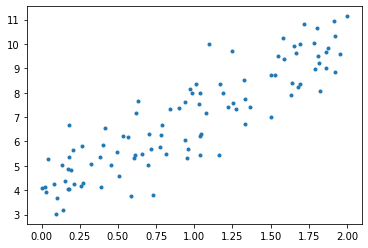

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y, marker='.')
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.96815494]
 [3.07143031]]


我们期待的是$\theta_0=4$,$\theta_1=3$，得到的是$\theta_0=3.7$,$\theta_1=3.1$。非常接近，噪声的存在使得其不可能完全还原为原本的函数。

现在可以用$\hat \theta$做出预测：

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.96815494]
 [10.11101557]]


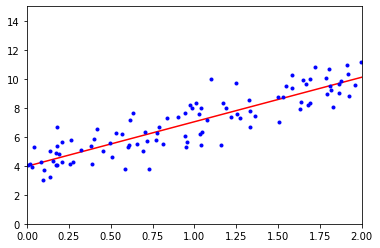

In [6]:
# 绘制模型的预测结果
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# Scikit-learn的等效代码如下
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

lin_reg.predict(X_new)

[3.96815494] [[3.07143031]]


array([[ 3.96815494],
       [10.11101557]])

## 计算复杂度

标准方程求逆的矩阵$X^T \cdot X$，是一个$n \times n$矩阵（n是特征数量）。对这种矩阵求逆的计算复杂度通常为$O(n^{2.4})$到$O(n^{3})$之间（取决于计算实现）。换句话说，如果将特征数量翻倍，那么计算时间将乘以大约$2^{2.4}=5.3$倍到$2^{3}=8$倍之间。

好的一面是，相对于训练集中的实例数量(O(m))来说，方程是线性的。

# 梯度下降

应用梯度下降时，需要保证所有特征值的大小比例差不多，否则收敛的时间会长很多。

训练模型也就是搜寻使成本函数（在训练集上）最小化的参数组合。这是模型*参数空间*层面上的搜索：模型的参数越多，这个空间的维度就越多，搜索就越难。

## 批量梯度下降

要实现梯度下降，你需要计算每个模型关于参数$\theta_j$的成本函数的梯度。换言之，你需要计算的时如果改变$\theta_j$，成本函数会改变多少。这被称为*偏导数*。

公式4-5：成本函数的偏导数
$$
\frac {\partial MSE(\theta)} {\partial \theta_j} = \frac 2 m \sum_{i=1}^m (\theta^T \cdot x^{(i)} - y^{(i)})x_j^{(i)}
$$

如果不想单独计算这些梯度，可以使用公式4-6对其进行一次性计算。梯度向量，记作$\nabla_{\theta}MSE(\theta)$，包含所有成本函数（每一个模型参数一个）的偏导数。

公式4-6：成本函数的梯度向量
$$
\nabla_{\theta} MSE(\theta) = 
$$

批量梯度下降：每一步都使用整批训练数据。

一旦有了梯度向量，哪个点向上，就朝反方向下坡。也就是从$\theta$中减去$\nabla_{\theta}MSE(\theta)$，这时学习率$\eta$就发挥作用了：用梯度向量乘以$\eta$确定下坡步长的大小。

公式4-7：梯度下降步长
$$
\theta^{(next step)} = \theta - \eta \nabla_{\theta}MSE(\theta)
$$

In [8]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initiazation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[3.96815494]
 [3.07143031]]


**怎么选择学习率？**

可以用网格搜索

**怎么限制迭代次数？**

在开始时设置一个非常大的迭代次数，但是当梯度向量的值变得很微小时中断算法——也就是相当于它的范数变得低于$\varepsilon$（称为容差）时，因为这时梯度下降已经（几乎）达到了最小值。


**收敛率**

成本函数为凸函数，并且斜率没有陡峭的变化时（如MSE成本函数），通过批量梯度下降可以看出一个固定的学习率有一个收敛率，为$0(\frac 1 {迭代次数})$。换句话说，如果将容差$\varepsilon$缩小为原来的1/10（以得到更精确的解），算法将不得不运行10倍的迭代次数。

## 随机梯度下降

由于算法的随机性质，它比批量梯度下降要不规则得多。
成本函数将不再是缓缓降直到抵达最小值，而是不断上上下下，但是从整体来看，还是缓慢下降。
但即使它到达了最小值，依然还会持续反弹，永远不会停止。所以算法停下来的参数值肯定是足够好的，但不是最优的。
当成本函数非常不规则时，随机梯度下降其实可以帮助算法跳出局部最小值，所以相比批量梯度下降，它对找到全局最小值更有优势。

因此，随机性的好处在于可以跳出局部最优，缺点是永远定位不出最小值。
一个折中的办法是：逐步降低学习率。这个过程叫做*模拟退火*。

In [9]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[3.94404283]
 [3.07381354]]


## 小批量梯度下降

介于批量梯度下降和随机梯度下降之间，每次选择一定数量的实例计算梯度。

**线性回归算法比较**

|算法|实例很多|是否支持核外|特征很多|超参数|是否需要缩放|
|--- |--- | ---      |--- |---   |---      |
|标准方程|快|否|慢|0|否|
|批量梯度下降|慢|否|快|2|是|
|随机梯度下降|快|是|快|>=2|是|
|小批量梯度下降|快|是|快|>=2|是|


## 多项式回归

如果数据比简单的直线更为复杂，怎么办？

令人意想不到的是，其实你也可以用线性模型来拟合非线性数据。

一个简单的方法就是将每个特征的幂次方添加为一个新特征，然后在这个拓展过的特征集上训练线性模型。这种方法被称为*多项式回归*。


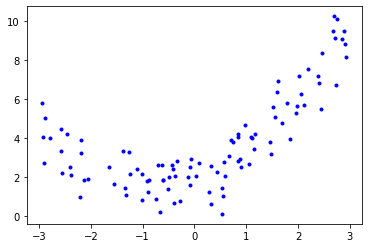

In [10]:
# 制造非线性数据
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.show()

In [11]:
# 解释如https://www.cnblogs.com/liweiwei1419/p/9715702.html
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) 

print(X[0])
print(X_poly[0])

[-2.58132148]
[-2.58132148  6.66322058]


In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.99078429]), array([[0.88368101, 0.56441219]]))

因此，预估模型$\hat y = 0.46x_1^2 + 1.02x_1 + 1.93$，而实际上原函数是$y = 0.5x^2 + 1.0x + 2.0 + 高斯噪声$

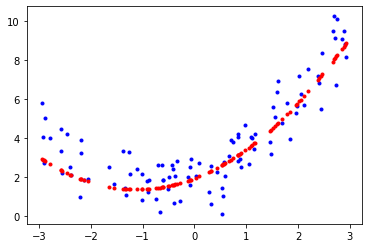

In [13]:
y_pred = 0.46 * X ** 2 + 1.02 * X + 1.93

plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r.')
plt.show()

## 学习曲线

对于上一个例子，如果用300阶的模型拟合数据，可能会严重的过拟合，如果线性模型则会拟合不足。这个案例中泛化最好的是二次模型。

但一般来说，你不会知道生成数据的函数是什么，那么该如何确定模型的复杂程度呢？怎么才能判断模型是过拟合还是欠拟合呢？

其中一种方法是交叉验证来评估模型的泛化性能，还有一种方法是*观察学习曲线*：这个曲线绘制的是模型在训练集和验证集上，关于“训练集大小”的性能函数。要生成这个曲线，只需要在不同大小的训练子集上多次训练模型即可。

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.axis([0, 80, 0, 3])


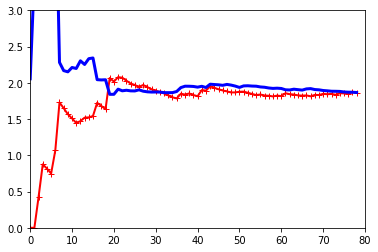

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

 这条学习曲线是典型的模型拟合不足。两条曲线均到达高地，非常接近，而且相当高。

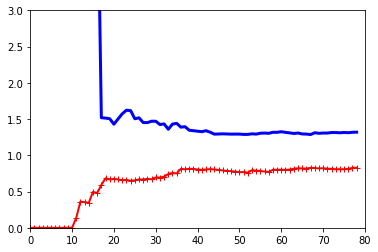

In [16]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression()),
    ))
plot_learning_curves(polynomial_regression, X, y)

对比可知：
- 训练数据的误差远低于线性回归模型。
- 两条曲线之间有一定差距。这正是过拟合的标志。

**偏差/方差权衡**

模型的泛化误差可以被表示为三个截然不同的误差之和：

*偏差*

这部分泛化误差的原因在于错误的假设，比如假设数据是线性的，而实际上是二次的。高偏差模型最有可能对训练数据拟合不足。

*方差*

这部分误差是由于模型对训练数据的微小变化过度敏感导致的。具有高自由度的模型（例如高阶多项式模型）很可能也有高方差，所以很容易对训练数据过度拟合。

*不可避免的误差*

这部分误差是因为数据本身的噪声所致。减少这部分误差的唯一方法就是清理数据（例如修复数据源，如损坏的传感器，或者是检测平移除异常值）。

增加模型的复杂度通常会显著提升模型的方差，减少偏差。反过来，降低模型的复杂度则会提升模型的偏差，降低方差。这就是为什么称其为权衡。


# 正则线性模型

对线性模型来说，正则化通常通过约束模型的权重来实现。

## 岭回归

岭回归（也叫吉洪诺夫正则化）是线性回归的正则化版：在成本函数中添加一个等于$\alpha \sum_{i=1}^n \theta_i^2$的正则项。

超参数$\alpha$控制的是对模型进行正则化的程度。
如果$\alpha=0$，则岭回归就是线性模型。
如果$\alpha$非常大，则所有的权重都将非常接近零，结果是一条穿过数据平均值的水平线。

公式4-8：岭回归成本函数
$$
J(\theta) = MSE(\theta) + \alpha \frac 1 2 \sum_{i=1}^2
$$
这里偏置项$\theta_0$没有正则化。如果我们将w定义为特征权重的向量，那么正则项即等于$\frac 1 2 (||w||_2)^2$其中$||w||_2$为权重向量的$l_2$范数。

在执行岭回归之前，必须对数据进行缩放，因为它对输入特征的大小非常敏感。大多数正则化模型都是如此。


公式4-9：闭式解的岭回归
$$
\hat \theta = (X^T \cdot X + \alpha A)^-1 \cdot X^T \cdot y
$$

In [17]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[4.96980082]])

In [18]:
# 使用随机梯度下降
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([4.95471951])

## 套索回归

线性回归的另一种正则化，叫*最小绝对收缩和选择算子回归*（Least Absolute Shrinkage and Selection Oprerator Regression,简称Lasso回归或套索回归）。

公式4-10：Lasso回归成本函数
$$
J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_i|
$$

Lasso回归的一个重要特点是它倾向于完全消除掉最不重要的特征的权重。换句话说，Lasso回归会自动执行特征选择并输出一个稀疏模型。

当$\theta_i = 0(i=1,2,...,n)$，Lasso成本函数是不可微的，但是，当任意$\theta_i = 0$时，如果使用*次梯度向量*g作为替代，依旧可以让梯度下降正常运转。

公式4-11：Lasso回归次梯度向量
$$
g(\theta, J) = \nabla_{\theta} MSE(\theta) + \alpha 
$$

In [19]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.92632982])

## 弹性网络

弹性网络是岭回归与Lasso回归之间的中间地带。

公式4-12：弹性网络成本函数
$$
J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^n |\theta_i| + \frac {1-r} 2 \alpha \sum_{i=1}^n \theta_i^2
$$


In [20]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([4.92884689])

## 早期停止法

对随机梯度下降和小批量梯度下降来说，曲线不会很平滑，所以很难知道是否已经达到最小值。一种解决方法是等验证误差超过最小值一段时间之后再停止（这时你可以确信模型不会变得更好了），然后将模型参数回滚到验证误差最小的位置。


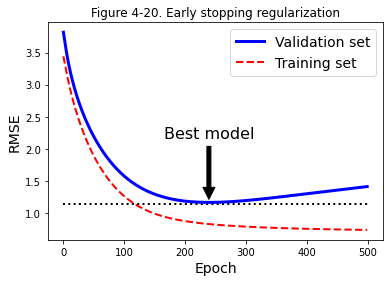

In [22]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title('Figure 4-20. Early stopping regularization') # not shown in the book
plt.show()

In [23]:
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter_no_change=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_epoch, best_model

(42,
 SGDRegressor(eta0=0.0005, learning_rate='constant', n_iter_no_change=1,
              penalty=None, warm_start=True))

## 逻辑回归

一些回归算法也可以用于分类（反之亦然）。逻辑回归（Logistic回归，也叫罗吉思回归）被广泛用于估算一个实例属于某个特定类别的概率。

逻辑回归模型也是计算输入特征的加权和（加上偏置项），但是不同于线性回归模型直接输出结果，它输出的是结果的数理逻辑

公式4-13：逻辑回归模型概率估算（向量化形式）
$$
\hat p = h_{\theta}(X) = \sigma (\theta^T \cdot X)
$$

逻辑模型，是一个sigmoid函数，记作$\sigma(\cdot)$

公式4-14：逻辑函数
$$
\sigma(t) = \frac 1 {1+exp(-t)}
$$


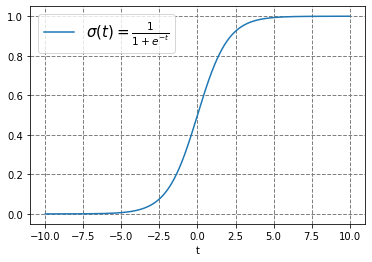

In [36]:
x = np.arange(-10, 10, 0.001)
y = 1 / (1 + np.exp(-x))
plt.plot(x,y)
plt.legend([r'$\sigma (t) = \frac {1} {1+e^{-t}}$'], fontsize=15)
plt.grid(color='gray')
plt.grid(linewidth='1')
plt.grid(linestyle='--')
plt.xlabel('t')

plt.show()

一旦逻辑回归模型估算出实例X属于正类的概率$\hat p = h_{\theta}(x)$，就可以做出预测$\hat y$

公式4-15：逻辑回归模型预测
$$
\hat y = \begin{cases}
0 & (\hat p < 0.5)\\
1 & (\hat p >= 0.5)
\end{cases}
$$

## 训练和成本函数

公式4-16：单个训练实例的成本函数
$$
c(\theta) = \begin{cases}
-log(\hat p) & (y=1) \\
-log(1 - \hat p) & (y=0)
\end{cases}
$$

整个训练集的成本函数即为所有训练实例的平均成本。

公式4-17：逻辑回归成本函数（log损失函数
$$
J(\theta) = - \frac 1 m \sum_{i=1}^m [y^{(i)}log(\hat p) + (1 - y^{(i)})log(1 - \hat p^{(i)})]
$$
这个函数没有已知的闭式方程来计算出最小的成本函数%\theta%值。但这个函数是凸函数，所以通过梯度下降保证能够找出全局最小值。

公式4-18：Logicstic成本函数的偏导数
$$
\frac {\partial J(\theta)} {\partial \theta_j} = \frac 1 m \sum_{i=1}^m (\sigma(\theta^T \cdot X^{(i)}) - y^{(i)})x_j^{(i)}
$$

## 决策边界

创建一个分类器来检测Virginica鸢尾花。

In [40]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [41]:
X = iris['data'][:, 3:]  #petal width
y = (iris['target'] == 2).astype(np.int)

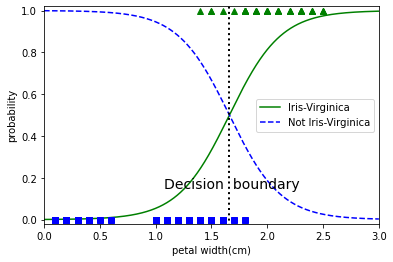

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.legend()
plt.xlabel('petal width(cm)')
plt.ylabel('probability')

plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.axis([0, 3, -0.02, 1.02])
plt.show()

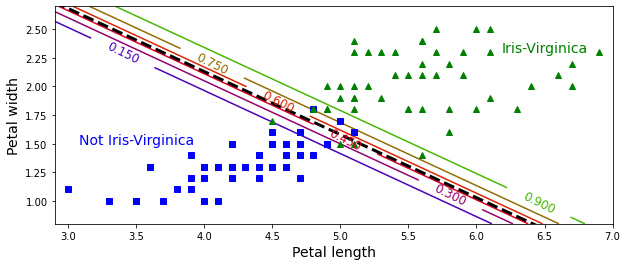

In [50]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

# Softmax回归

逻辑回归经过推广，可以支持多个类别，而不需要训练并组合多个二元分类器。这就是Softmax回归，或者叫多元逻辑回归。
